In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/sgpgi/los_ipd.csv')
df.head(5)
df['length_of_stay'].max()

273

In [5]:
mean_los = df['length_of_stay'].mean()
median_los = df['length_of_stay'].median()
std_los = df['length_of_stay'].std()

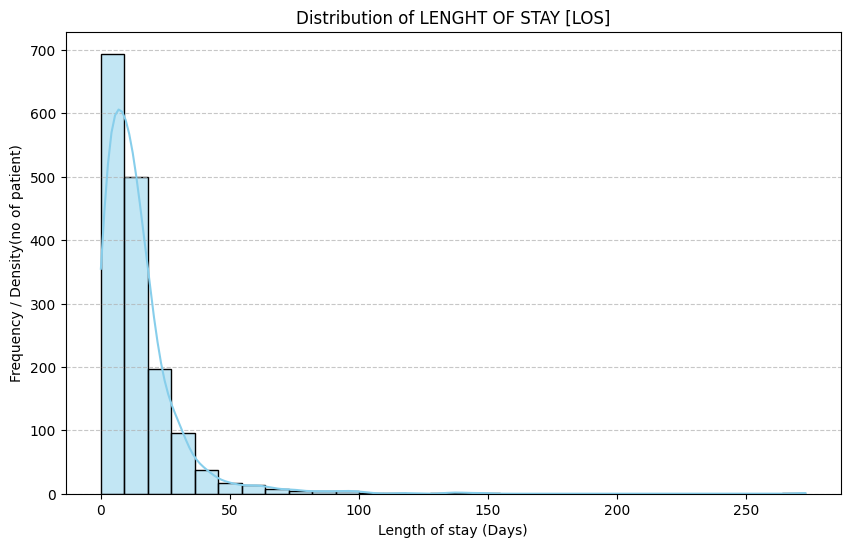

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['length_of_stay'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of LENGHT OF STAY [LOS]')
plt.xlabel('Length of stay (Days)')
plt.ylabel('Frequency / Density(no of patient)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

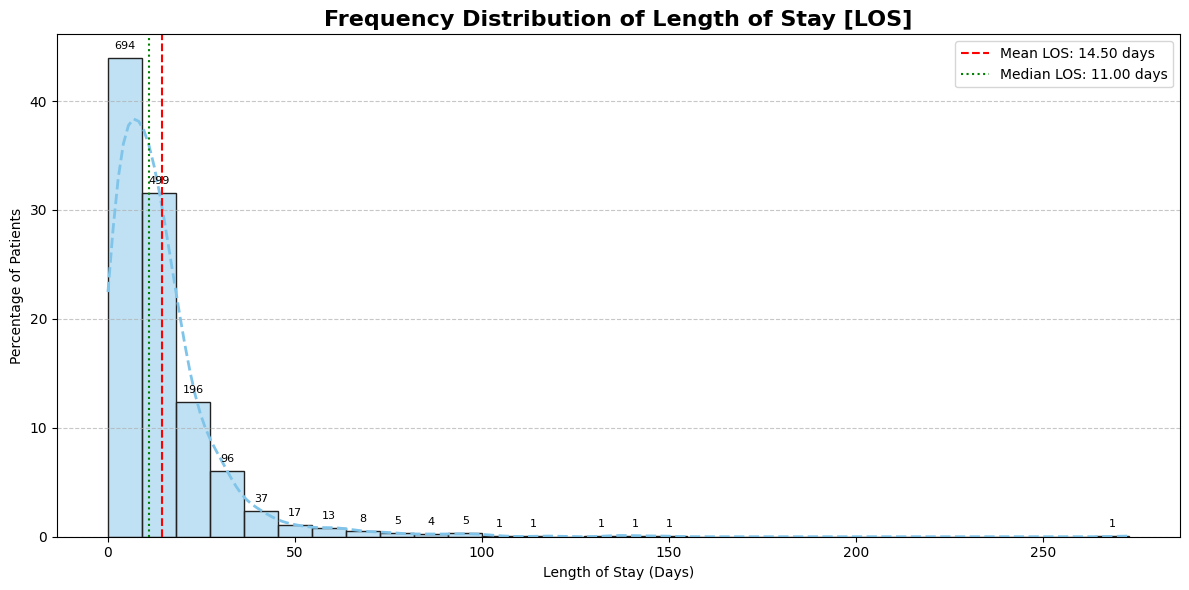

In [ ]:
import numpy as np

plt.figure(figsize=(12, 6))
ax = plt.gca()

# Perform the histogram plot and draw it on 'ax'
sns.histplot(
    df['length_of_stay'],
    bins=30,
    color='#80C4E9',
    stat='percent',
    edgecolor='#222222',
    kde=True,
    line_kws={'color': '#F6FF99', 'lw': 2, 'linestyle': '--'},
    ax=ax
)

# Calculate actual counts per bin (for annotation) using np.histogram
counts, bins = np.histogram(df['length_of_stay'], bins=30)

# Annotate each bar with the total number of patients
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    # Ensure we don't go out of bounds for counts array
    if i < len(counts) and counts[i] > 0: # Only annotate if there are patients in the bin
        ax.annotate(f'{counts[i]}',
                    xy=(patch.get_x() + patch.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=8, color='black')

plt.axvline(mean_los, color='red', linestyle='--', label=f'Mean LOS: {mean_los:.2f} days')
plt.axvline(median_los, color='green', linestyle=':', label=f'Median LOS: {median_los:.2f} days')

plt.title('Frequency Distribution of Length of Stay [LOS]',fontsize=16, fontweight='bold')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Percentage of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [58]:
df.head(5)

,person_id,visit_occurrence_id,visit_concept_id,visit_start_date,visit_end_date,length_of_stay
0,942,1204,9201,2023-03-11,2023-04-08,28
1,943,1257,9201,2023-03-14,2023-03-17,3
2,943,1749,9201,2023-04-10,2023-04-18,8
3,943,2569,9201,2023-05-19,2023-06-01,13
4,944,737,9201,2023-02-15,2023-02-17,2


# LOS FOR SURGERY


In [6]:
df_los=pd.read_csv('/content/drive/MyDrive/sgpgi/procedure_visit_los.csv')
df_los.head()

,person_id,procedure_occurrence_id,procedure_concept_id,visit_occurrence_id,visit_concept_id,visit_start_date,visit_end_date,length_of_stay
0,1927,916,4284104,7291,9201,2024-01-23,2024-02-16,24
1,1607,298,4284104,2483,9201,2023-05-16,2023-05-26,10
2,1528,109,4203153,863,9201,2023-02-21,2023-03-01,8
3,1943,854,4203153,6840,9201,2023-12-26,2024-01-18,23
4,1361,36,4203153,286,9201,2023-01-24,2023-02-02,9


In [7]:
surg_concept_id = {
    4284104: "Aortocoronary artery bypass graft",
    4203153: "Replacement of mitral valve",
    4012932: "Atrioseptoplasty",
    4095407: "Replacement of aortic valve",
    4304688: "Double valve replacement",
    4294387: "Correction of ventricular septal defect",
    4302815: "Robot assisted laparoscopic coronary artery bypass",
    4019929: "Repair of tetralogy of Fallot",
    4142628: "Pericardiectomy"
}


In [8]:
df_los = df_los[df_los['procedure_concept_id'].isin(surg_concept_id)]
# Map procedure_concept_id to procedure_concept_name for better readability
df_los['procedure_name'] = df_los['procedure_concept_id'].map(surg_concept_id)
df_los.head()

,person_id,procedure_occurrence_id,procedure_concept_id,visit_occurrence_id,visit_concept_id,visit_start_date,visit_end_date,length_of_stay,procedure_name
0,1927,916,4284104,7291,9201,2024-01-23,2024-02-16,24,Aortocoronary artery bypass graft
1,1607,298,4284104,2483,9201,2023-05-16,2023-05-26,10,Aortocoronary artery bypass graft
2,1528,109,4203153,863,9201,2023-02-21,2023-03-01,8,Replacement of mitral valve
3,1943,854,4203153,6840,9201,2023-12-26,2024-01-18,23,Replacement of mitral valve
4,1361,36,4203153,286,9201,2023-01-24,2023-02-02,9,Replacement of mitral valve


In [9]:
# Calculate the average length of stay for each procedure concept ID
average_los_by_procedure = df_los.groupby('procedure_name')['length_of_stay'].mean().reset_index()

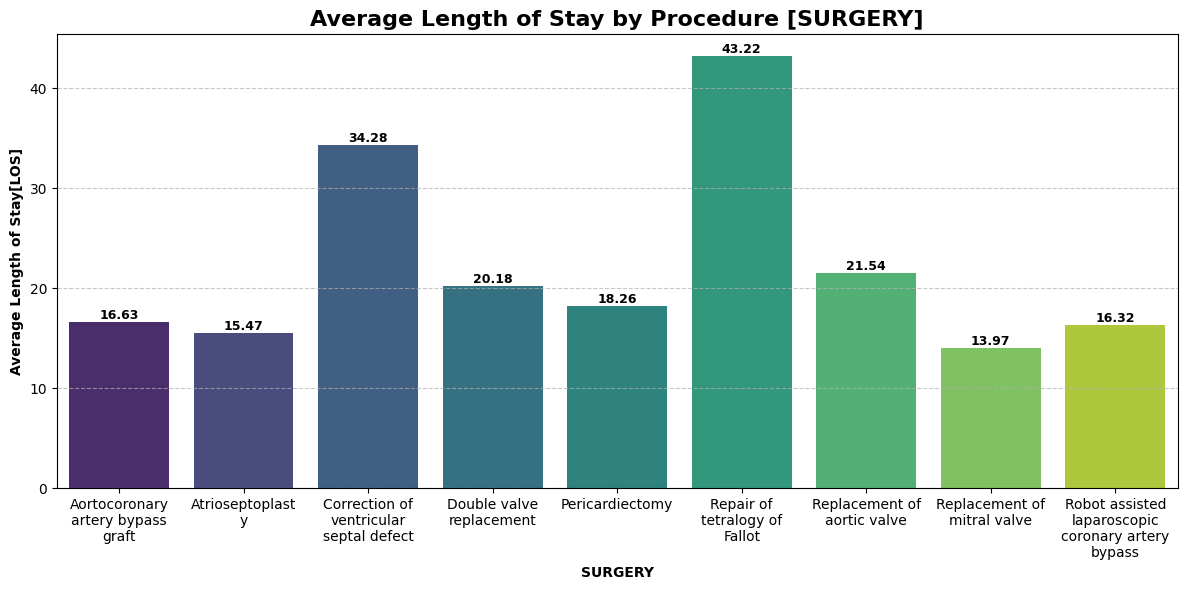

In [10]:
import textwrap

# Calculate the average length of stay for each procedure concept ID
average_los_by_procedure = df_los.groupby('procedure_name')['length_of_stay'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='procedure_name', y='length_of_stay',
            data=average_los_by_procedure,
            palette='viridis',
            hue='procedure_name', legend=False)

plt.title('Average Length of Stay by Procedure [SURGERY]',fontsize=16, fontweight='bold')
plt.xlabel('SURGERY',fontweight='bold')
plt.ylabel('Average Length of Stay[LOS]',fontweight='bold')

# Get current x-tick labels
labels = [item.get_text() for item in ax.get_xticklabels()]
# Wrap long labels
wrapped_labels = ['\n'.join(textwrap.wrap(label, 15)) for label in labels] # Adjust 15 for desired line length

# Set the tick locations first to fix them (addressing the UserWarning)
ax.set_xticks(ax.get_xticks())
# Set new labels
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=10)

# Add mean value on top of each bar
for index, row in average_los_by_procedure.iterrows():
    ax.text(index, row['length_of_stay'], f'{row['length_of_stay']:.2f}',
            color='black', ha="center", va='bottom', fontsize=9, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
average_los_by_procedure['length_of_stay'].rename('average_length-of_stay')
average_los_by_procedure['length_of_stay']

,length_of_stay
0,15.470588
1,43.222222
2,21.543210
3,18.257143
4,13.968641
5,16.629179
6,34.279070
7,16.324324
8,20.177215


,procedure_concept_id,length_of_stay
0,4012932,15.470588
1,4019929,43.222222
2,4095407,21.543210
3,4142628,18.257143
4,4203153,13.968641
5,4284104,16.629179
6,4294387,34.279070
7,4302815,16.324324
8,4304688,20.177215


from matplotlib import pyplot as plt
average_los_by_procedure['procedure_concept_id'].plot(kind='hist', bins=20, title='procedure_concept_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
average_los_by_procedure['length_of_stay'].plot(kind='hist', bins=20, title='length_of_stay')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
average_los_by_procedure.plot(kind='scatter', x='procedure_concept_id', y='length_of_stay', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['procedure_concept_id']
  ys = series['length_of_stay']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = average_los_by_procedure.sort_values('procedure_concept_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('procedure_concept_id')
_ = plt.ylabel('length_of_stay')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['procedure_concept_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'procedure_concept_id'}, axis=1)
              .sort_values('procedure_concept_id', ascending=True))
  xs = counted['procedure_concept_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = average_los_by_procedure.sort_values('procedure_concept_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('procedure_concept_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
average_los_by_procedure['procedure_concept_id'].plot(kind='line', figsize=(8, 4), title='procedure_concept_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
average_los_by_procedure['length_of_stay'].plot(kind='line', figsize=(8, 4), title='length_of_stay')
plt.gca().spines[['top', 'right']].set_visible(False)

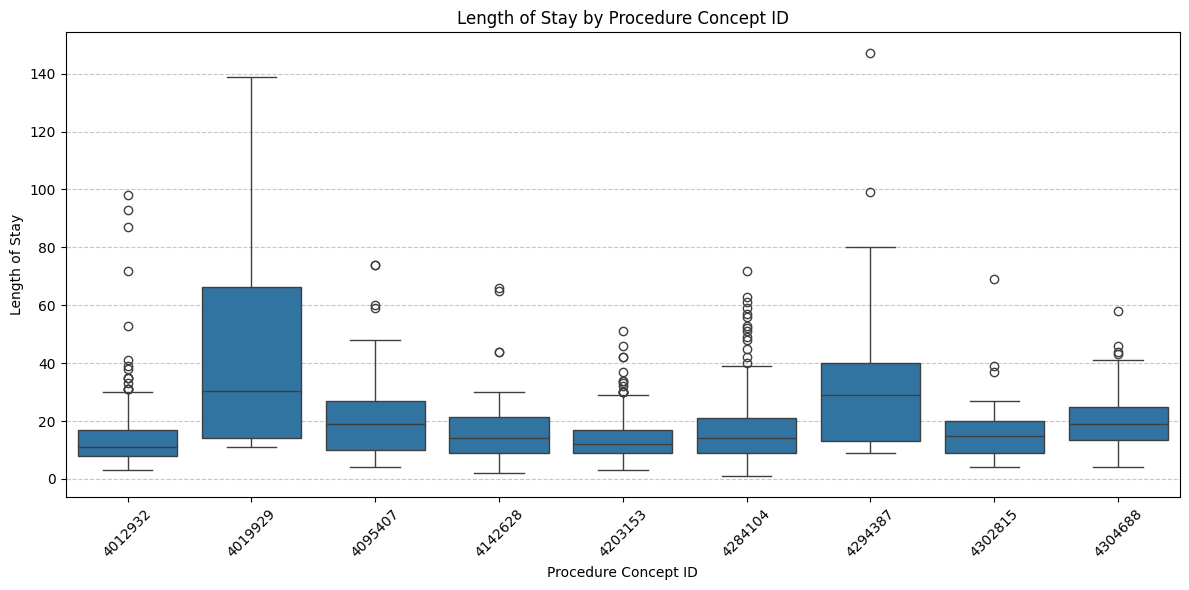

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='procedure_concept_id', y='length_of_stay', data=df_los)
plt.title('Length of Stay by Procedure Concept ID')
plt.xlabel('Procedure Concept ID')
plt.ylabel('Length of Stay')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

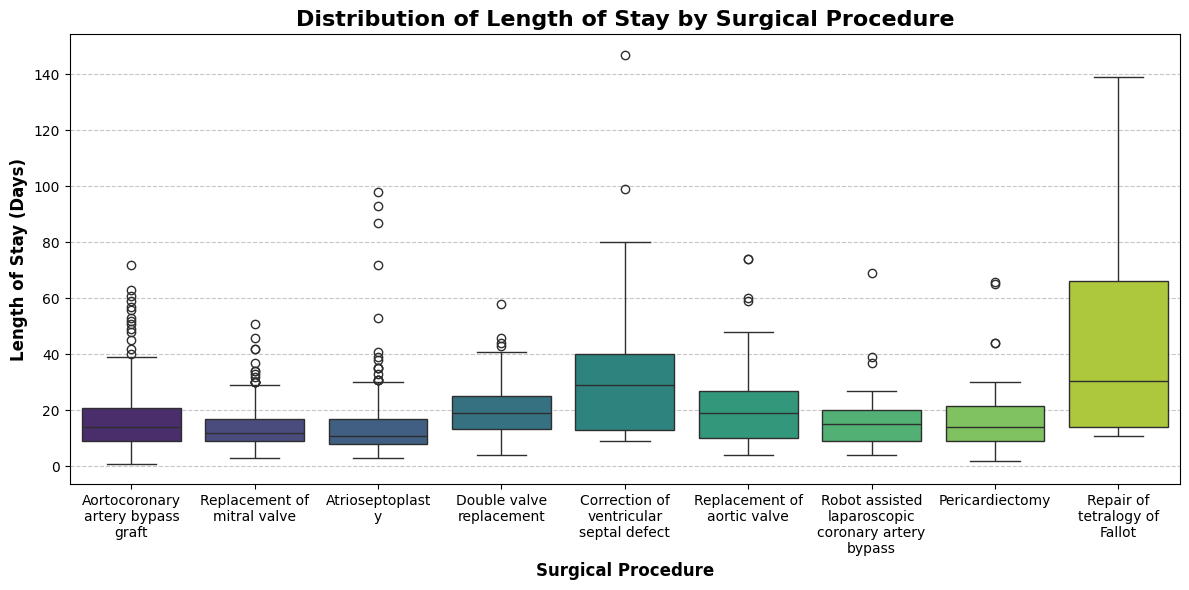

In [79]:

plt.figure(figsize=(12, 6))

# Create the box plot using df_los and procedure_name
sns.boxplot(x='procedure_name', y='length_of_stay', data=df_los, palette='viridis', hue='procedure_name', legend=False)

plt.title('Distribution of Length of Stay by Surgical Procedure', fontsize=16, fontweight='bold')
plt.xlabel('Surgical Procedure', fontsize=12,fontweight='bold')
plt.ylabel('Length of Stay (Days)', fontsize=12,fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Get current x-tick labels
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
# Wrap long labels for better readability
wrapped_labels = ['\n'.join(textwrap.wrap(label, 15)) for label in labels] # Adjust 15 for desired line length

# Set the tick locations first to fix them (addressing the UserWarning)
plt.gca().set_xticks(plt.gca().get_xticks())
# Set new labels
plt.gca().set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=10)

plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# LOS based on gender


In [80]:
df_los_gender = pd.read_csv('/content/drive/MyDrive/sgpgi/los_person.csv')
df_los_gender.head()

,person_id,gender_concept_id,age_at_admission,visit_occurrence_id,visit_concept_id,visit_start_date,visit_end_date,length_of_stay
0,942,8532,35,1204,9201,2023-03-11,2023-04-08,28
1,943,8507,63,1257,9201,2023-03-14,2023-03-17,3
2,943,8507,63,1749,9201,2023-04-10,2023-04-18,8
3,943,8507,63,2569,9201,2023-05-19,2023-06-01,13
4,944,8507,54,737,9201,2023-02-15,2023-02-17,2


In [101]:
gender_counts = df_los_gender['gender'].value_counts()

In [86]:
gender={
    8532: 'FEMALE',
    8507: 'MALE',
    8551: 'UNKNOWN',
    8521: 'OTHER'
}

In [87]:
df_los_gender = df_los_gender[df_los_gender['gender_concept_id'].isin(gender)]
df_los_gender['gender'] = df_los_gender['gender_concept_id'].map(gender)
df_los_gender.head()

,person_id,gender_concept_id,age_at_admission,visit_occurrence_id,visit_concept_id,visit_start_date,visit_end_date,length_of_stay,gender
0,942,8532,35,1204,9201,2023-03-11,2023-04-08,28,FEMALE
1,943,8507,63,1257,9201,2023-03-14,2023-03-17,3,MALE
2,943,8507,63,1749,9201,2023-04-10,2023-04-18,8,MALE
3,943,8507,63,2569,9201,2023-05-19,2023-06-01,13,MALE
4,944,8507,54,737,9201,2023-02-15,2023-02-17,2,MALE


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

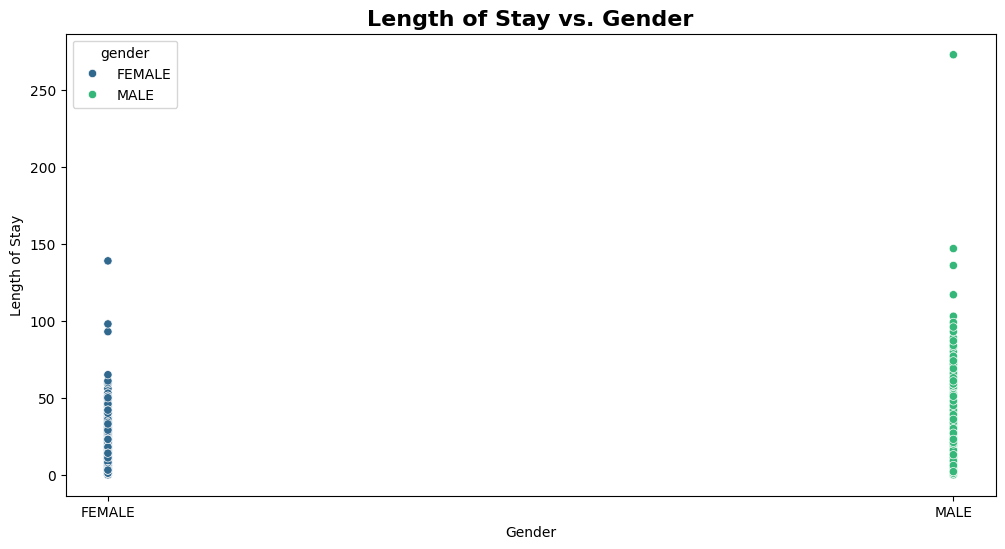

In [99]:
df_los_gender['gender'].value_counts()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='gender', y='length_of_stay', data=df_los_gender, palette='viridis', hue= 'gender')
plt.title('Length of Stay vs. Gender',fontsize=16, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Length of Stay')
plt

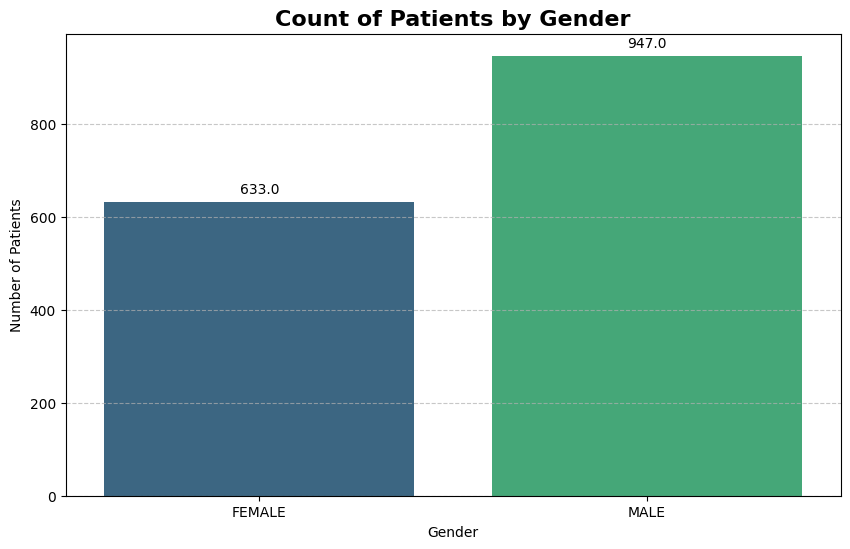

In [97]:
# Bar plot for gender value counts
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', data=df_los_gender, palette='viridis', hue='gender', legend=False) # Assign hue to x-variable and set legend=False to prevent warning

plt.title('Count of Patients by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add total count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

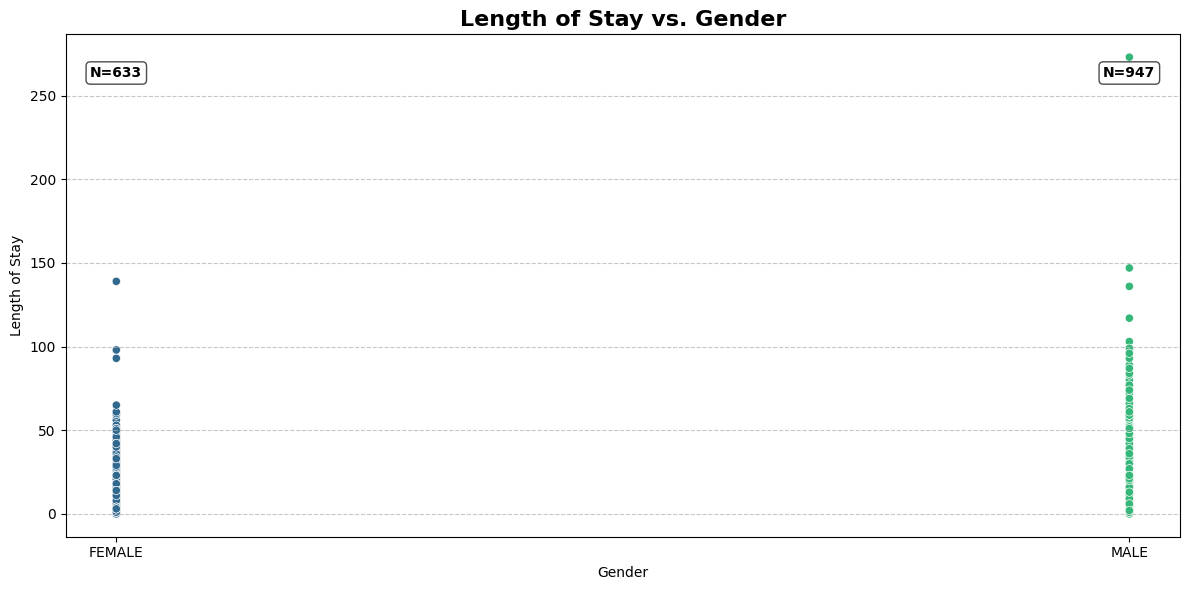

In [100]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='gender', y='length_of_stay', data=df_los_gender, palette='viridis', hue='gender', legend=False)

plt.title('Length of Stay vs. Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Length of Stay')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add total count for each gender as text annotations
# Get the x-coordinates for 'FEMALE' and 'MALE' on the plot
x_coords = ax.get_xticks()
x_labels = [label.get_text() for label in ax.get_xticklabels()]

for i, gender_label in enumerate(x_labels):
    count = gender_counts.get(gender_label, 0)
    # Position text slightly above the top of the scatter points for that gender
    # Max LOS can be used as a reference for y position, or a fixed offset
    y_pos = df_los_gender['length_of_stay'].max() * 0.95 # Adjust y-position as needed
    plt.text(x_coords[i], y_pos, f'N={count}',
             horizontalalignment='center', verticalalignment='bottom',
             fontsize=10, color='black', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

plt.tight_layout()
plt.show()